In [81]:
import pandas as pd
from pylab import rcParams

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [97]:
#import and preparing the dataset
from sklearn.datasets import load_breast_cancer

#loading de data
breast_cancer = load_breast_cancer()
#creating dataframe with the data
df_breast = pd.DataFrame(breast_cancer.data, columns=breast.feature_names)
#filling with the target values
df_breast["target"] = breast_cancer.target
#mapping categorical values
df_breast["target_label"] = df_breast["target"].map({0:"maligno",1:"benigno"})


In [86]:
#visualizing


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [66]:
#verifiying null values
df_iris.isna().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flor_specie          0
flor_specie_name     0
dtype: int64

In [88]:
#count target names
df_breast['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [98]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [94]:
df_breast.shape

(569, 31)

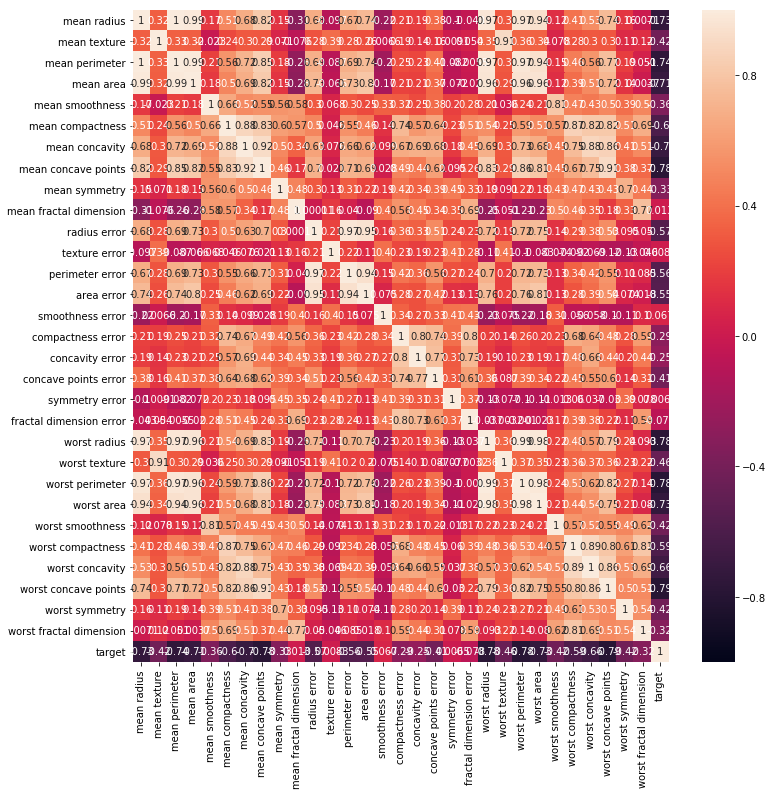

In [90]:
#Ploting Correlations
plt.figure(figsize=(12, 12))
sns.heatmap(df_breast.corr(),vmin=-1,vmax=1,annot=True,cbar=True)


In [172]:
# Standardize the feature matrix
features_names = set(df_breast.columns)-set(["target"])-set(["target_label"])
data_standarzed = StandardScaler().fit_transform(df_breast[features_names].values)




In [48]:
sns.heatmap(df_iris)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [170]:

def pca_model(data,retained_variance):
    # Create a PCA that will retain some % of variance
    pca = PCA(n_components=retained_variance, whiten=True)

    # Conduct PCA
    data_pca = pca.fit_transform(data)

    # Show results
    print("Original number of features:", data.shape[1])
    print("Reduced number of features:", data_pca.shape[1])

    return pca

In [173]:
pca_model(data_standarzed,0.99)
pca_model(data_standarzed,0.95)
pca_model(data_standarzed,0.90)

Original number of features: 30
Reduced number of features: 17
Original number of features: 30
Reduced number of features: 10
Original number of features: 30
Reduced number of features: 7


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [60]:
df_iris_pca = pd.DataFrame(features_pca,columns=["P1","P2"])
df_iris_pca["flor_specie_name"] = df_iris["flor_specie_name"].values

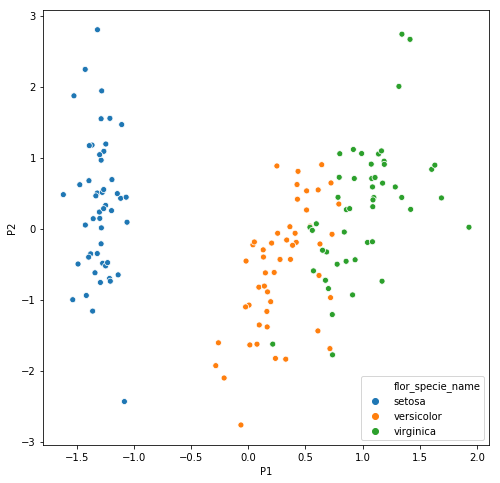

In [64]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='P1', y='P2', data=df_iris_pca, hue='flor_specie_name')
plt.show()

In [181]:
len(features_names)

30

In [182]:
pca = PCA(n_components = len(features_names))
pca.fit_transform(features)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [183]:
len(pca.components_)

30

In [184]:
def plot_explained_varience(pca):
    '''
    This function received the transformed data and plots it in scree plots
    '''
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.grid(b=True)
    plot = plt.show()


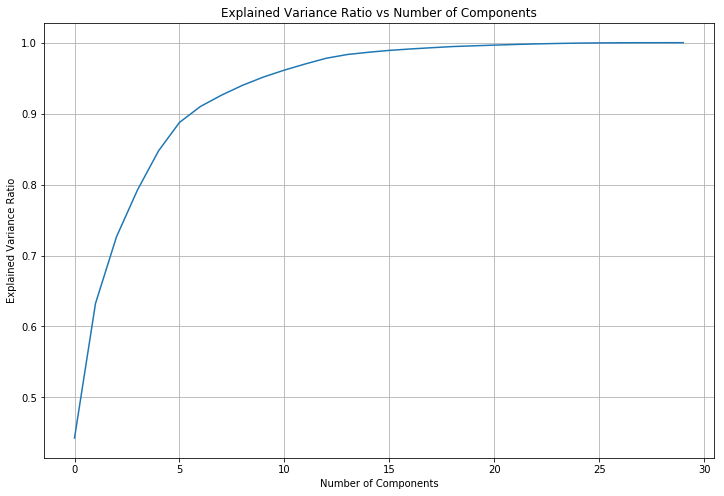

In [185]:
plot_explained_varience(pca)

In [228]:
#Using 3 components
pca = PCA(n_components=3, whiten=True)
data_pca = pca.fit_transform(data_standarzed)

#Constructing DataFrame
df_pca_3components = pd.DataFrame(data=data_pca)
df_pca_3components["target"] = df_breast["target"].values




In [224]:
pca.components_.shape

(3, 30)

In [220]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


0.7263637090860156

In [204]:
df_pca_3components = pd.DataFrame(data=data_pca)
df_pca_3components["target"] = df_breast["target"].values

In [210]:
m

array(['^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^',
       '^', '^', '^', '^', '^', '^', 'o', 'o', 'o', '^', '^', '^', '^',
       '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', 'o', '^',
       '^', '^', '^', '^', '^', '^', '^', 'o', '^', 'o', 'o', 'o', 'o',
       'o', '^', '^', 'o', '^', '^', 'o', 'o', 'o', 'o', '^', 'o', '^',
       '^', 'o', 'o', 'o', 'o', '^', 'o', '^', '^', 'o', '^', 'o', '^',
       '^', 'o', 'o', 'o', '^', '^', 'o', '^', '^', '^', 'o', 'o', 'o',
       '^', 'o', 'o', '^', '^', 'o', 'o', 'o', '^', '^', 'o', 'o', 'o',
       'o', '^', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o',
       '^', '^', '^', 'o', '^', '^', 'o', 'o', 'o', '^', '^', 'o', '^',
       'o', '^', '^', 'o', '^', '^', 'o', 'o', '^', 'o', 'o', '^', 'o',
       'o', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o',
       '^', 'o', 'o', 'o', 'o', '^', '^', 'o', '^', 'o', 'o', '^', '^',
       'o', 'o', '^', '^', 'o', 'o', 'o', 'o', '^', 'o', 'o', '^

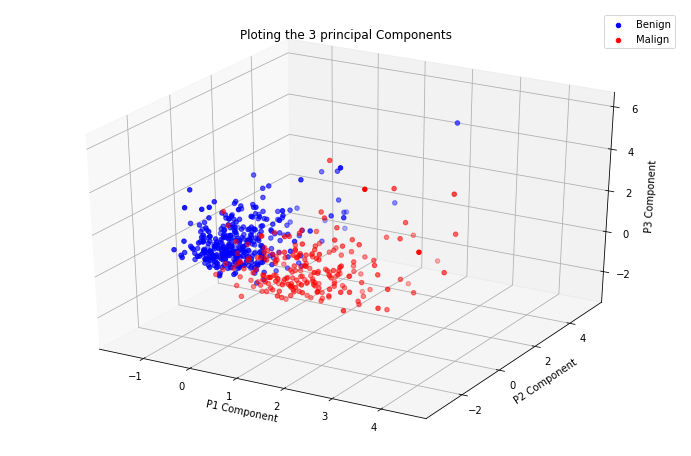

In [221]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#selecting Benign Labels
df_pca_3components_benign = df_pca_3components[df_pca_3components["target"]==1]
#selecting Malign Labels
df_pca_3components_malign = df_pca_3components[df_pca_3components["target"]==0]


x_benign = df_pca_3components_benign[0].values
y_benign = df_pca_3components_benign[1].values
z_benign = df_pca_3components_benign[2].values

#Color of benign will be blue
color_benign = "blue"

x_malign = df_pca_3components_malign[0].values
y_malign = df_pca_3components_malign[1].values
z_malign = df_pca_3components_malign[2].values

#Color of malign will be red
color_malign = "red"

#Ploting Both Benign and Malign
ax.scatter(x_benign,y_benign,z_benign, c=color_benign,label="Benign")
ax.scatter(x_malign,y_malign,z_malign, c=color_malign,label="Malign")
ax.legend()


ax.set_xlabel('P1 Component')
ax.set_ylabel('P2 Component')
ax.set_zlabel('P3 Component')
ax.set_title("Ploting the 3 principal Components")

plt.show()

In [232]:
#Getting components
components = pca.components_
#constructing a dict with feature names and first principal components
feature_weights = dict(zip(features_names, components[0]))
#Sorting
sorted_weights = sorted(feature_weights.items(), key = lambda kv: kv[1])
#Lowest Weights
print('Lowest Weigths: ')
for feature, weight, in sorted_weights[:4]:
    print('\t{:20} {:.3f}'.format(feature, weight))
#Highest Weights
print('Highest Weights: ')
for feature, weight in sorted_weights[-4:]:
    print('\t{:20} {:.3f}'.format(feature, weight))

Lowest Weigths: 
	smoothness error     0.015
	texture error        0.017
	symmetry error       0.042
	mean fractal dimension 0.064
Highest Weights: 
	mean compactness     0.239
	worst concave points 0.251
	mean concavity       0.258
	mean concave points  0.261


In [236]:
sorted_weights[0]

('smoothness error', 0.014531452183500215)

[]

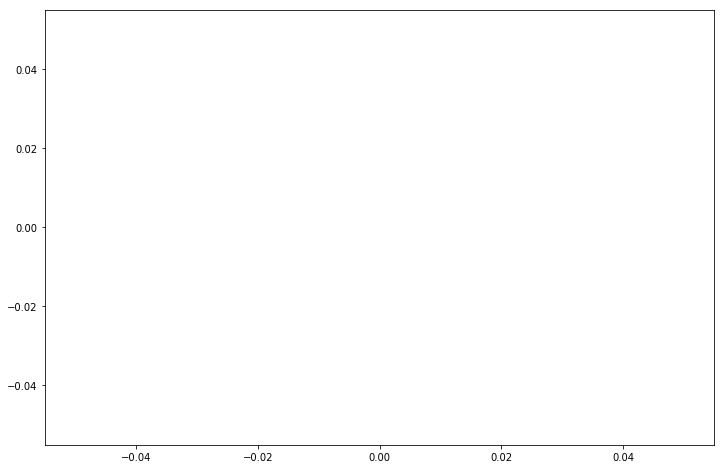

In [234]:
plt.plot(kind="bar",x=sorted_weights)

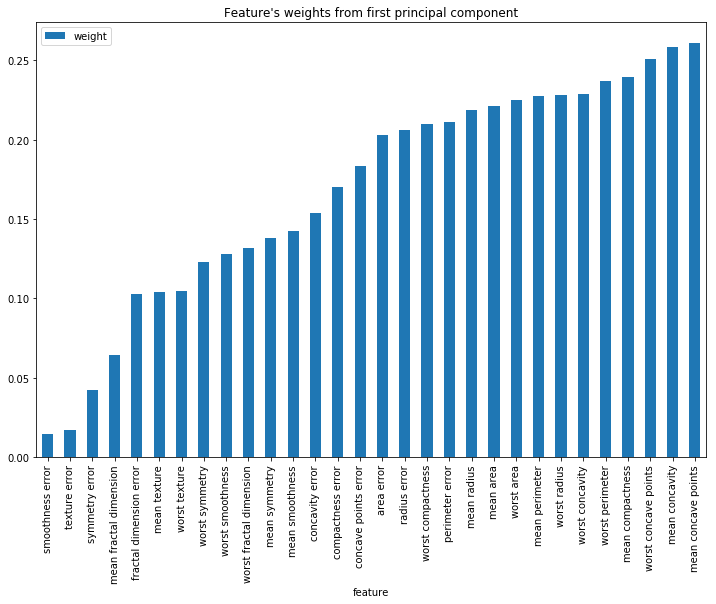

In [241]:
data = []
for feature, weight, in sorted_weights:
    data.append([feature,weight])

df =  pd.DataFrame(data,columns=["feature","weight"])    
df.set_index("feature",inplace=True)

df.plot(kind="bar",title="Feature's weights from first principal component")